In [38]:
# 加载Google Drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [39]:
# 加载已经训练好的LeNet模型
import tensorflow as tf

model = tf.keras.models.load_model('/gdrive/My Drive/AI/model/lenet_model.h5')
# model = tf.keras.models.load_model('/gdrive/My Drive/lenet_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

(262, 278, 3)
(262, 278)


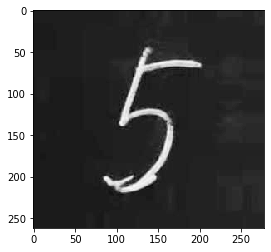

In [40]:
import cv2
import matplotlib.pyplot as plt

# 第一步：读取图片
img = cv2.imread('/gdrive/My Drive/AI/dataset/5.jpg')#8.png
print(img.shape)

# 第二步：将图片转为灰度图
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img,cmap='Greys')

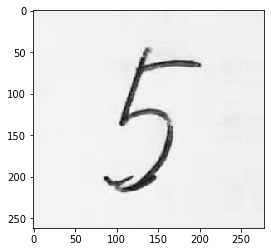

In [41]:
# 第三步：将图片的底色和字的颜色取反
img = cv2.bitwise_not(img)
plt.imshow(img,cmap='Greys')

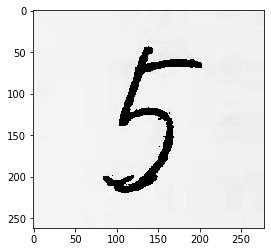

In [42]:
# 第四步：将底变成纯白色，将字变成纯黑色
img[img<=100]=0
img[img>140]=255  # 130

# 显示图片
plt.imshow(img,cmap='Greys')

In [43]:
# 第五步：将图片尺寸缩放为输入规定尺寸
img = cv2.resize(img,(32,32))

# 第六步：将数据类型转为float32
img = img.astype('float32')

# 第七步：数据正则化
img /= 255

# 第八步：增加维度为输入的规定格式
img = img.reshape(1, 32, 32, 1)
print(img.shape)

# 第九步：预测
pred = model.predict(img)

# 第十步：输出结果
print(pred.argmax())

(1, 32, 32, 1)
5
